In [3]:
# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# 2. Select only digits 0 and 1
mask = (y == 0) | (y == 1)
X_binary = X[mask]
y_binary = y[mask]

# 3. Count how many 0s and 1s
unique, counts = np.unique(y_binary, return_counts=True)
print("Distribution of digits in the dataset:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

# 4. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

# 5. Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 6. Evaluate performance
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)


Distribution of digits in the dataset:
Digit 0: 6903 samples
Digit 1: 7877 samples

Model Evaluation:
Accuracy: 0.9997
Confusion Matrix:
[[1401    1]
 [   0 1554]]


Distribution of digits in the dataset:
Digit 0: 6903 samples
Digit 1: 7877 samples


/tmp/ipython-input-790726300.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


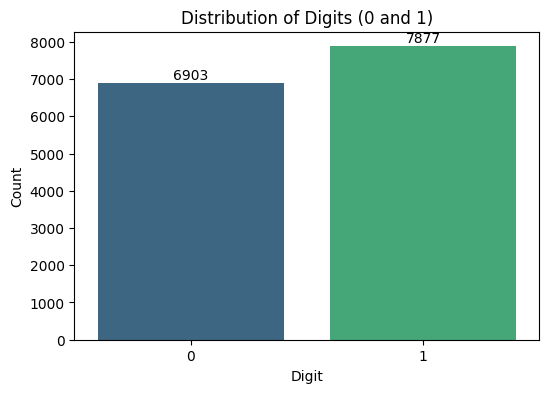

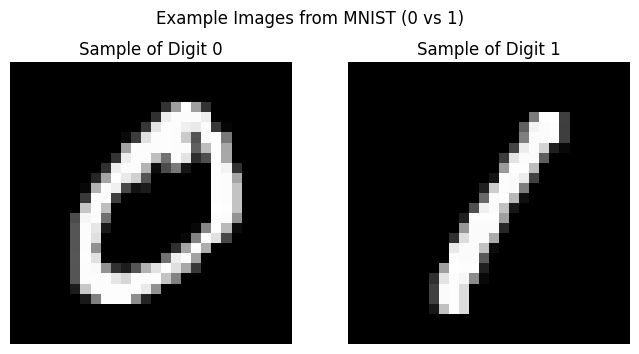


Model Evaluation:
Accuracy: 0.9997
Confusion Matrix:
[[1401    1]
 [   0 1554]]


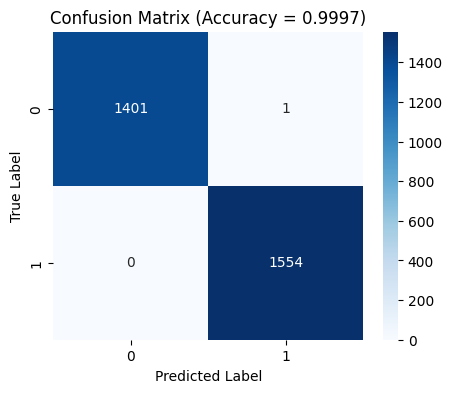

In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# 2. Select only digits 0 and 1
mask = (y == 0) | (y == 1)
X_binary = X[mask]
y_binary = y[mask]

# 3. Count how many 0s and 1s
unique, counts = np.unique(y_binary, return_counts=True)
print("Distribution of digits in the dataset:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

# --- Plot distribution of digits ---
plt.figure(figsize=(6, 4))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.title("Distribution of Digits (0 and 1)")
plt.xlabel("Digit")
plt.ylabel("Count")
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center')
plt.show()

# --- Show sample images ---
plt.figure(figsize=(8, 4))
for i, digit in enumerate(unique):
    idx = np.where(y_binary == digit)[0][0]
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_binary[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Sample of Digit {digit}")
    plt.axis("off")
plt.suptitle("Example Images from MNIST (0 vs 1)")
plt.show()

# 4. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

# 5. Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 6. Evaluate performance
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

# --- Plot confusion matrix ---
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f"Confusion Matrix (Accuracy = {acc:.4f})")
plt.show()

